In [23]:
import numpy as np
import pickle

with open('AllThreeSplit.bin', 'rb') as f:
    splits = pickle.load(f)
    
print(*splits.keys())

allThreeYesWrat groups


In [9]:
len(splits['allThreeYesWrat'])
# splits['groups']

593

In [11]:
with open('AllSubjectsMeta.bin', 'rb') as f:
    meta = pickle.load(f)
    
print(len(meta.keys()))

941


In [24]:
subidsNp = np.array(splits['allThreeYesWrat'])

nm = 0
nf = 0

mages = []
fages = []

for sid in subidsNp:
    if meta[sid]['meta']['Gender'] =='M':
        nm += 1
        mages.append(meta[sid]['meta']['AgeInMonths']/12)
    if meta[sid]['meta']['Gender'] == 'F':
        nf += 1
        fages.append(meta[sid]['meta']['AgeInMonths']/12)

mages = np.array(mages)
fages = np.array(fages)
        
print('Males = {:} Females = {:}'.format(nm, nf))
print('Male ages {:.3} +- {:.3}'.format(mages.mean(), mages.std()))
print('Female ages {:.3} +- {:.3}'.format(fages.mean(), fages.std()))



Males = 271 Females = 322
Male ages 15.0 +- 3.11
Female ages 15.2 +- 3.35


In [25]:


binLabels = np.arange(8,23)
binMales = np.zeros(binLabels.shape)
binFemales = np.zeros(binLabels.shape)

for label in binLabels:
    stop = label+1
    for age in mages:
        if age >= label and age < stop:
            binMales[label-binLabels[0]] += 1
    for age in fages:
        if age >= label and age < stop:
            binFemales[label-binLabels[0]] += 1
            
print(binLabels)
print(binMales)
print(binFemales)
print(binMales.sum()+binFemales.sum())



[ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
[ 2. 14. 20. 14. 26. 32. 33. 20. 33. 21. 23. 19. 10.  4.  0.]
[ 4. 22. 21. 18. 28. 26. 24. 29. 36. 32. 37. 24. 13.  7.  1.]
593.0


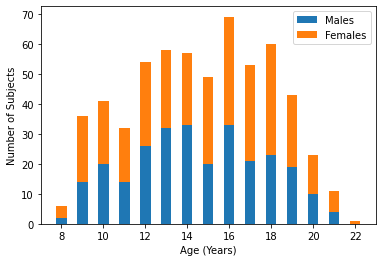

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [26]:
import matplotlib.pyplot as plt

width = 0.5

fig, ax = plt.subplots()

ax.bar(binLabels, binMales, width, label='Males')
ax.bar(binLabels, binFemales, width, bottom=binMales, label='Females')

ax.set_ylabel('Number of Subjects')
# ax.set_title('Age Distribution of Subjects')
ax.set_xlabel('Age (Years)')
ax.legend()

plt.show()
fig.savefig('FigureAgeDistribution.eps', format='eps', bbox_inches='tight')



In [19]:
emoidDir = r'C:\Users\aorli\Documents\Tulane\Research\PNC\OneDrive_1_9-21-2020\emoid_fmri_power264\timeseries'
restDir = r'C:\Users\aorli\Documents\Tulane\Research\PNC\OneDrive_1_9-21-2020\rest_fmri_power264\timeseries'
nbackDir = r'C:\Users\aorli\Documents\Tulane\Research\PNC\OneDrive_1_9-21-2020\nback_fmri_power264\timeseries'

dirs = [emoidDir, restDir, nbackDir]
for d in dirs:
    with open(d + r'\0.bin', 'rb') as f:
        ts = pickle.load(f)
        print(ts.shape)

(264, 210)
(264, 124)
(264, 231)


<ipython-input-27-74a795780428>:120: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


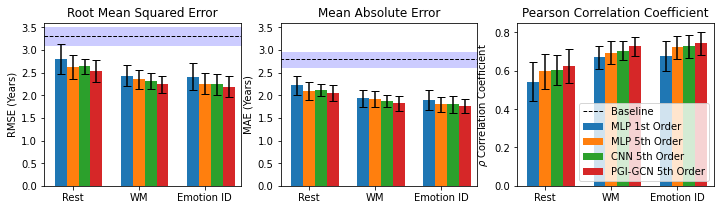

In [27]:


import matplotlib.pyplot as plt
import numpy as np

ind = np.arange(1,4)
width = 0.18

rmseMlp1 = (2.8, 2.43, 2.41)
rmseMlp5 = (2.62, 2.35, 2.25)
rmseCnn5 = (2.64, 2.32, 2.24)
rmseMlp5Gcn = (2.54, 2.24, 2.19)

rmseMlp1Err = (0.33, 0.23, 0.29)
rmseMlp5Err = (0.27, 0.21, 0.23)
rmseCnn5Err = (0.17, 0.18, 0.23)
rmseMlp5GcnErr = (0.24, 0.19, 0.23)

maeMlp1 = (2.22, 1.93, 1.9)
maeMlp5 = (2.1, 1.91, 1.8)
maeCnn5 = (2.12, 1.88, 1.8)
maeMlp5Gcn = (2.05, 1.82, 1.76)

maeMlp1Err = (0.21, 0.19, 0.22)
maeMlp5Err = (0.20, 0.18, 0.17)
maeCnn5Err = (0.13, 0.13, 0.19)
maeMlp5GcnErr = (0.17, 0.16, 0.16)

ccMlp1 = (0.543, 0.671, 0.677)
ccMlp5 = (0.597, 0.693, 0.721)
ccCnn5 = (0.603, 0.705, 0.727)
ccMlp5Gcn = (0.624, 0.727, 0.743)

ccMlp1Err = (0.10, 0.06, 0.08)
ccMlp5Err = (0.09, 0.06, 0.06)
ccCnn5Err = (0.08, 0.05, 0.06)
ccMlp5GcnErr = (0.09, 0.05, 0.06)

# rmseMlp1Std = (0.065574385, 0.123423391, 0.106926766)
# rmseMlp5Std = (0.104403065, 0.234591844, 0.191398363)
# rmseMlp5GcnStd = (0.03, 0.237135685, 0.118462371)

# plt.bar(ind, rmseMlp1, width, label='MLP 1st Order', 
#         color='#ddd', yerr=rmseMlp1Std, capsize=4)
# plt.bar(ind + width, rmseMlp5, width, label='MLP 5th Order', 
#         color='#bbb', yerr=rmseMlp5Std, capsize=4)
# plt.bar(ind + 2*width, rmseMlp5Gcn, width, label='PGI-GCN 5th Order', 
#         color='#999', yerr=rmseMlp5GcnStd, capsize=4)

fig, ax = plt.subplots(1,3,figsize=(12,3))

# ax[0].grid(True)
# ax[1].grid(True)
# ax[2].grid(True)

ax[0].bar(ind, rmseMlp1, width, label='MLP 1st Order', 
        capsize=4, yerr=rmseMlp1Err)
ax[0].bar(ind + width, rmseMlp5, width, label='MLP 5th Order', 
        capsize=4, yerr=rmseMlp5Err)
ax[0].bar(ind + 2*width, rmseCnn5, width, label='CNN 5th Order', 
        capsize=4, yerr=rmseCnn5Err)
ax[0].bar(ind + 3*width, rmseMlp5Gcn, width, label='PGI-GCN 5th Order', 
        capsize=4, yerr=rmseMlp5GcnErr)

ax[0].fill_between([0.75,3.75],[3.3-0.195,3.3-0.195],[3.3+0.195,3.3+0.195], color='#ccf')
ax[0].plot([0.5,3.8],[3.3, 3.3],label='Baseline',color='black',linestyle='dashed',linewidth=1)

ax[0].set_ylabel('RMSE (Years)')
ax[0].set_title('Root Mean Squared Error')

ax[0].set_xticks(ind + width)
ax[0].set_xticklabels(('Rest', 'WM', 'Emotion ID'))
# ax[0].legend(loc='lower right')
ax[0].set_xlim(0.75,3.73)
ax[0].set_ylim(0,3.6)

ax[1].bar(ind, maeMlp1, width, label='MLP 1st Order', 
        capsize=4, yerr=maeMlp1Err)
ax[1].bar(ind + width, maeMlp5, width, label='MLP 5th Order', 
        capsize=4, yerr=maeMlp5Err)
ax[1].bar(ind + 2*width, maeCnn5, width, label='CNN 5th Order', 
        capsize=4, yerr=maeCnn5Err)
ax[1].bar(ind + 3*width, maeMlp5Gcn, width, label='PGI-GCN 5th Order', 
        capsize=4, yerr=maeMlp5GcnErr)

ax[1].fill_between([0.75,3.75],[2.79-0.168,2.79-0.168],[2.79+0.168,2.79+0.168], color='#ccf')
ax[1].plot([0.5,3.8],[2.79, 2.79],label='Baseline',color='black',linestyle='dashed',linewidth=1)

ax[1].set_ylabel('MAE (Years)')
ax[1].set_title('Mean Absolute Error')

ax[1].set_xticks(ind + width)
ax[1].set_xticklabels(('Rest', 'WM', 'Emotion ID'))
# ax[1].legend(loc='lower right')
ax[1].set_xlim(0.75,3.73)
ax[1].set_ylim(0,3.6)

ax[2].bar(ind, ccMlp1, width, label='MLP 1st Order', 
        capsize=4, yerr=ccMlp1Err)
ax[2].bar(ind + width, ccMlp5, width, label='MLP 5th Order', 
        capsize=4, yerr=ccMlp5Err)
ax[2].bar(ind + 2*width, ccCnn5, width, label='CNN 5th Order', 
        capsize=4, yerr=ccCnn5Err)
ax[2].bar(ind + 3*width, ccMlp5Gcn, width, label='PGI-GCN 5th Order', 
        capsize=4, yerr=ccMlp5GcnErr)

ax[2].set_ylabel(r'$\rho$ Correlation Coefficient')
ax[2].set_title('Pearson Correlation Coefficient')

ax[2].set_xticks(ind + width)
ax[2].set_xticklabels(('Rest', 'WM', 'Emotion ID'))
# ax[2].legend(loc='lower right')
ax[2].set_xlim(0.75,3.73)
ax[2].set_ylim(0,0.85)

ax[2].plot([0.5,3.8],[2.79, 2.79],label='Baseline',color='black',linestyle='dashed',linewidth=1)

# ax[3].set_axis_off()
ax[2].legend(loc='lower right')

# fig.suptitle('Age Prediction', y=0.95, fontsize='x-large')
fig.show()
fig.savefig('FigureAgePredict.eps', format='eps', bbox_inches='tight')



<ipython-input-18-fa31d804f9e7>:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


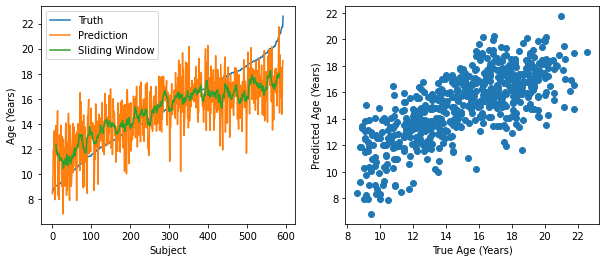

In [18]:
import pickle
import numpy as np

# Load meta dict

with open('AllSubjectsMeta.bin', 'rb') as f:
    meta = pickle.load(f)
    
# Load rest subject ids and splits

with open('AllThreeSplit.bin', 'rb') as f:
    splits = pickle.load(f)
    subids = splits['allThreeYesWrat']
    groups = splits['groups']
    
# print(len(subids))

# Create feature vectors (right now just ages, maleness, and femaless)

X_all = []
for subid in subids:
    subj = meta[subid]
    maleness = 1 if subj['meta']['Gender'] == 'M' else 0
    femaleness = 1 if maleness == 0 else 0
    feat = np.array([subj['meta']['AgeInMonths'], maleness, femaleness])
    X_all.append(feat)
X_all = np.vstack(X_all)

# print(X_all[10:20])
# print('Complete')

with open('CNN-5-Predictions-1-Emoid.bin', 'rb') as f:
    yPred = pickle.load(f)
    
import matplotlib.pyplot as plt
import math

# y = X_train[:,0]
# idcs = torch.arange(0,len(y))
# yPred = maskgcn([True, idcs]).detach().numpy().flatten()

y = X_all[:,0]
# yPred = agesPredMLP
# print()    
    
idcs = np.argsort(y)
yPred = yPred[idcs]
y = y[idcs]
ySmooth = np.convolve(yPred, np.ones(10)/10, mode='same')
ySmooth[0:9] = math.nan
ySmooth[-9:] = math.nan

# corr = np.corrcoef(y, yPred)
# rmse = (np.sum((y-yPred)**2)/len(y))**0.5/12
# mae = np.sum(np.abs(y-yPred))/12/len(y)

fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].plot(y/12, label='Truth')
ax[0].plot(yPred/12, label='Prediction')
ax[0].plot(ySmooth/12, label='Sliding Window')
# plt.title('True and Predicted Ages')
ax[0].set_ylabel('Age (Years)')
ax[0].set_xlabel('Subject')
ax[0].legend()
# plt.show()

ax[1].scatter(y/12, yPred/12)
# plt.title('Correlation Between Predicted and Actual Ages')
ax[1].set_ylabel('Predicted Age (Years)')
ax[1].set_xlabel('True Age (Years)')
# plt.show()

fig.show()
fig.savefig('FigureAgePredictEmoid.eps', format='eps', bbox_inches='tight')

In [1]:
import numpy as np

roiMap1 = np.zeros(265,dtype='int')
roiMap2 = np.zeros(265,dtype='int')
revMap2 = np.zeros(264,dtype='int')
roiNames = {}
borders1 = []
borders2 = []

with open('PP264_template.csv', 'r') as f:
    lines = f.readlines()
    for i in range(2,len(lines)):
        line = lines[i].split(',')
        area = int(line[11])
        r1 = int(line[0])
        r2 = int(line[1])
        name = line[14].strip()
        roiMap1[r1] = area
        roiMap2[r2] = area
        roiNames[area] = name
        revMap2[r1-1] = r2-1
#         print([area, r1, r2, name])

last1 = roiMap1[1]
last2 = roiMap2[1]
for i in range(2,265):
    if roiMap1[i] != last1:
        borders1.append(i)
        last1 = roiMap1[i]
    if roiMap2[i] != last2:
        borders2.append(i)
        last2 = roiMap2[i]
    
borders1 = [0] + borders1 + [264]
print(borders1)
print(borders2)

[0, 31, 36, 50, 63, 121, 126, 157, 182, 200, 213, 222, 233, 237, 264]
[13, 42, 47, 61, 74, 84, 86, 132, 133, 137, 138, 139, 140, 143, 174, 182, 186, 203, 221, 222, 235, 243, 247, 251, 253, 255, 256]


<ipython-input-2-131b03a7cc46>:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


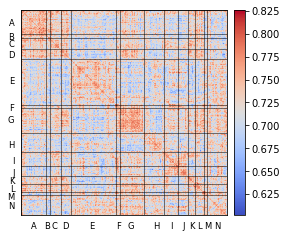

In [2]:
import pickle
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

with open('PGI-GCN-Masks-1-Rest.bin', 'rb') as f:
    masksRest = pickle.load(f)

# masksRest = torch.load('PGI-GCN-Masks-1-Rest.bin', map_location=torch.device('cpu'))
def rearrange(p,idcs):
    return p[:,idcs][idcs]

maskR = rearrange(torch.sigmoid(masksRest[0]).detach().cpu().numpy(), revMap2)

fig, ax = plt.subplots(figsize=(4,4))

divider = make_axes_locatable(ax)
cax1 = divider.append_axes('right', size='5%', pad=0.1)

im = ax.imshow(maskR, cmap='coolwarm')
for b in borders1:
    ax.plot([0,263],[b,b],color='black',linewidth=0.5)
    ax.plot([b,b],[0,263],color='black',linewidth=0.5)
ax.set_xlim(0,263)
ax.set_ylim(262,0)
ax.set_xticks((16, 33, 42, 56, 90, 124, 140, 172, 192, 207, 218, 228, 238, 250))
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N'), fontsize='small')
ax.set_yticks((16, 33, 42, 56, 90, 124, 140, 172, 192, 207, 218, 228, 238, 250))
ax.set_yticklabels(('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N'), fontsize='small')
ax.tick_params(left=False,bottom=False)

# ax.set_title('Rest Mask')

fig.colorbar(im, cax=cax1, orientation='vertical')

fig.show()
# fig.savefig('FigureMaskRest.eps', format='eps', bbox_inches='tight')

In [10]:
bounds = list(zip(borders1[0:-1], borders1[1:]))
regMap = ['SM Hand', 'SM Mouth', 'CNG', 'AUD', 'DMN', 'MEM', 'VIS', 'FRNT', 'SAL', 'SUB', 'VTRL', 'DRSL', 'CB', 'UNK']
regVal = dict()
for a in range(len(bounds)):
    for b in range(len(bounds)):
        i0,i1 = bounds[a]
        j0,j1 = bounds[b]
        regVal[(regMap[a], regMap[b])] = np.mean(maskR[i0:i1,j0:j1]) 

regVal = sorted(regVal.items(), key = lambda kv:(kv[1], kv[0]))
print(regVal)

[(('SM Mouth', 'SUB'), 0.699525), (('SUB', 'SM Mouth'), 0.699525), (('DMN', 'AUD'), 0.7026754), (('AUD', 'DMN'), 0.7026755), (('MEM', 'VTRL'), 0.7040017), (('VTRL', 'MEM'), 0.7040017), (('CB', 'VTRL'), 0.7040059), (('VTRL', 'CB'), 0.70400596), (('AUD', 'FRNT'), 0.70429647), (('FRNT', 'AUD'), 0.70429647), (('CB', 'SM Mouth'), 0.70498765), (('SM Mouth', 'CB'), 0.70498765), (('CB', 'FRNT'), 0.7050873), (('FRNT', 'CB'), 0.70508736), (('VTRL', 'DMN'), 0.70563847), (('DMN', 'VTRL'), 0.7056385), (('SM Hand', 'CB'), 0.70587), (('CB', 'SM Hand'), 0.70587003), (('CNG', 'DMN'), 0.706359), (('DMN', 'CNG'), 0.706359), (('SM Hand', 'SUB'), 0.7068736), (('SUB', 'SM Hand'), 0.70687366), (('AUD', 'SUB'), 0.70715606), (('SUB', 'AUD'), 0.70715606), (('FRNT', 'VIS'), 0.7078164), (('VIS', 'FRNT'), 0.7078164), (('SM Mouth', 'UNK'), 0.7085541), (('UNK', 'SM Mouth'), 0.7085541), (('FRNT', 'SM Mouth'), 0.70871425), (('SM Mouth', 'FRNT'), 0.70871425), (('DMN', 'DRSL'), 0.709926), (('DRSL', 'DMN'), 0.709926), ((

In [2]:
import pickle

with open('AllSubjectsMeta.bin', 'rb') as f:
    meta = pickle.load(f)
    
print(len(meta.keys()))

941


In [11]:
keys = list(meta.keys())

nR, nN, nE, nT = 0, 0, 0, 0

for key in keys:
    a, b, c = False, False, False
    if 'rest' in meta[key]:
        a = True
        nR += 1
    if 'nback' in meta[key]:
        b = True
        nN += 1
    if 'emoid' in meta[key]:
        c = True
        nE += 1
    if a and b and c:
        nT += 1
        
print(f'{nR} {nN} {nE} {nT}')


878 907 679 624


In [14]:
np.std(yPred/12)

2.5211684506865306

In [19]:
np.std((yPred[10:-10]-ySmooth[10:-10])/12)

1.6319333898927642

In [21]:
np.std(y/12)

3.2492614569433163